In [ ]:
!nvidia-smi

Thu Nov 14 11:45:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics
!yolo checks


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 54.8 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
Disk                32.6/112.6 GB
CPU                 Intel Xeon 2.20GHz
CPU count           2
GPU                 Tesla T4, 15102MiB
GPU count           1
CUDA                12.1

numpy               ✅ 1.26.4>=1.23.0
numpy               ✅ 1.26.4<2.0.0; sys_platform == "darwin"
matplotlib          ✅ 3

In [ ]:
%cd {HOME}


!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="FYe5jDeo36pyDYAIqQ00")
project = rf.workspace("fyp-770rm").project("screwhead-joezj")
version = project.version(5)
dataset = version.download("yolov8")



/content
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...


In [ ]:
import os

projectname = 'screwhead-5'
# Define the dataset directory
dataset_dir = '/content/'+projectname

# List contents of the dataset directory to confirm structure
os.listdir(dataset_dir)

# Check contents of specific directories
print("Train images:", os.listdir(os.path.join(dataset_dir, 'train', 'images')))
print("Validation images:", os.listdir(os.path.join(dataset_dir, 'valid', 'images')))

# Verify the content of data.yaml
with open(os.path.join(dataset_dir, 'data.yaml'), 'r') as file:
    print(file.read())




In [ ]:
import matplotlib
matplotlib.use('Agg')  # Use a non-interactive backend like Agg, which works in scripts.


In [ ]:

# //change project name
!yolo train model=yolov8m.pt data=/content/screwhead-5/data.yaml epochs=50 imgsz=640 plots=True


Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/screwhead-5/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

In [ ]:
!ls {HOME}/runs/detect/train/
# make sure you change the train
from IPython.display import Image, display
train = 'train'

args.yaml					    PR_curve.png	train_batch761.jpg
confusion_matrix_normalized.png			    R_curve.png		train_batch762.jpg
confusion_matrix.png				    results.csv		val_batch0_labels.jpg
events.out.tfevents.1733057190.ee9d4dcfb44b.1375.0  results.png		val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	val_batch1_pred.jpg
labels.jpg					    train_batch2.jpg	weights
P_curve.png					    train_batch760.jpg


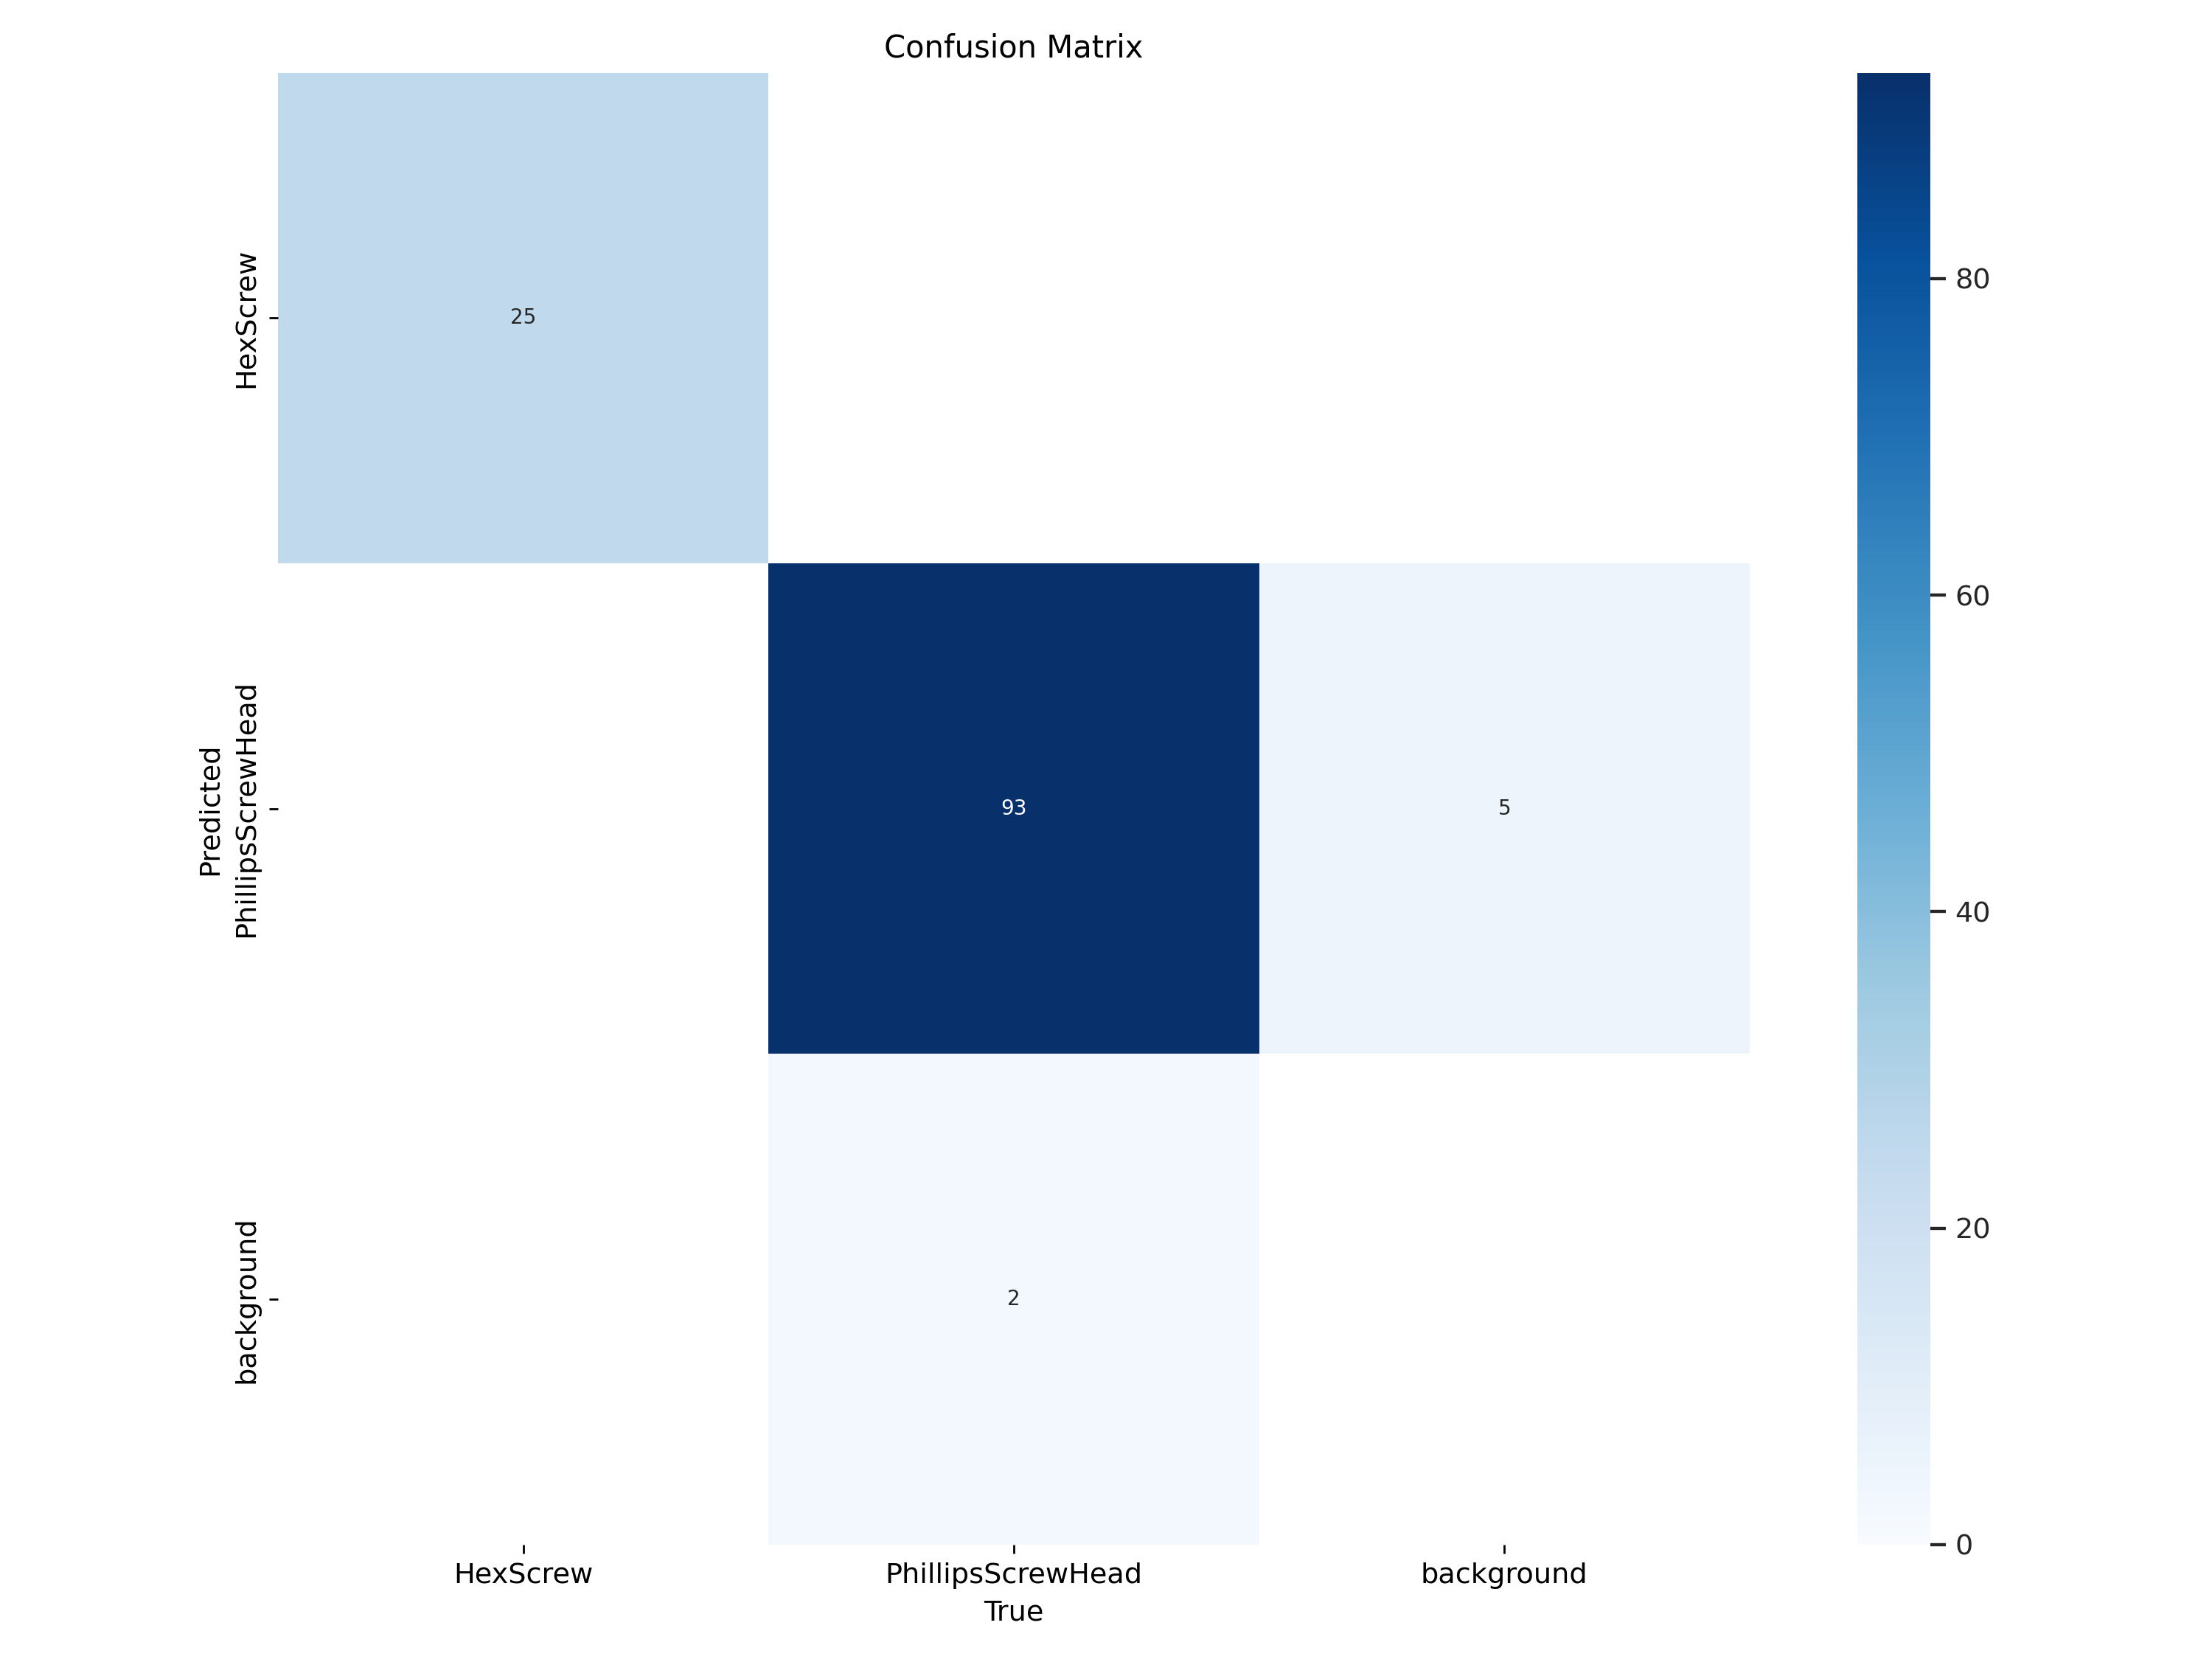

In [ ]:
Image(filename=f'{HOME}/runs/detect/'+train+'/confusion_matrix.png', width=600)

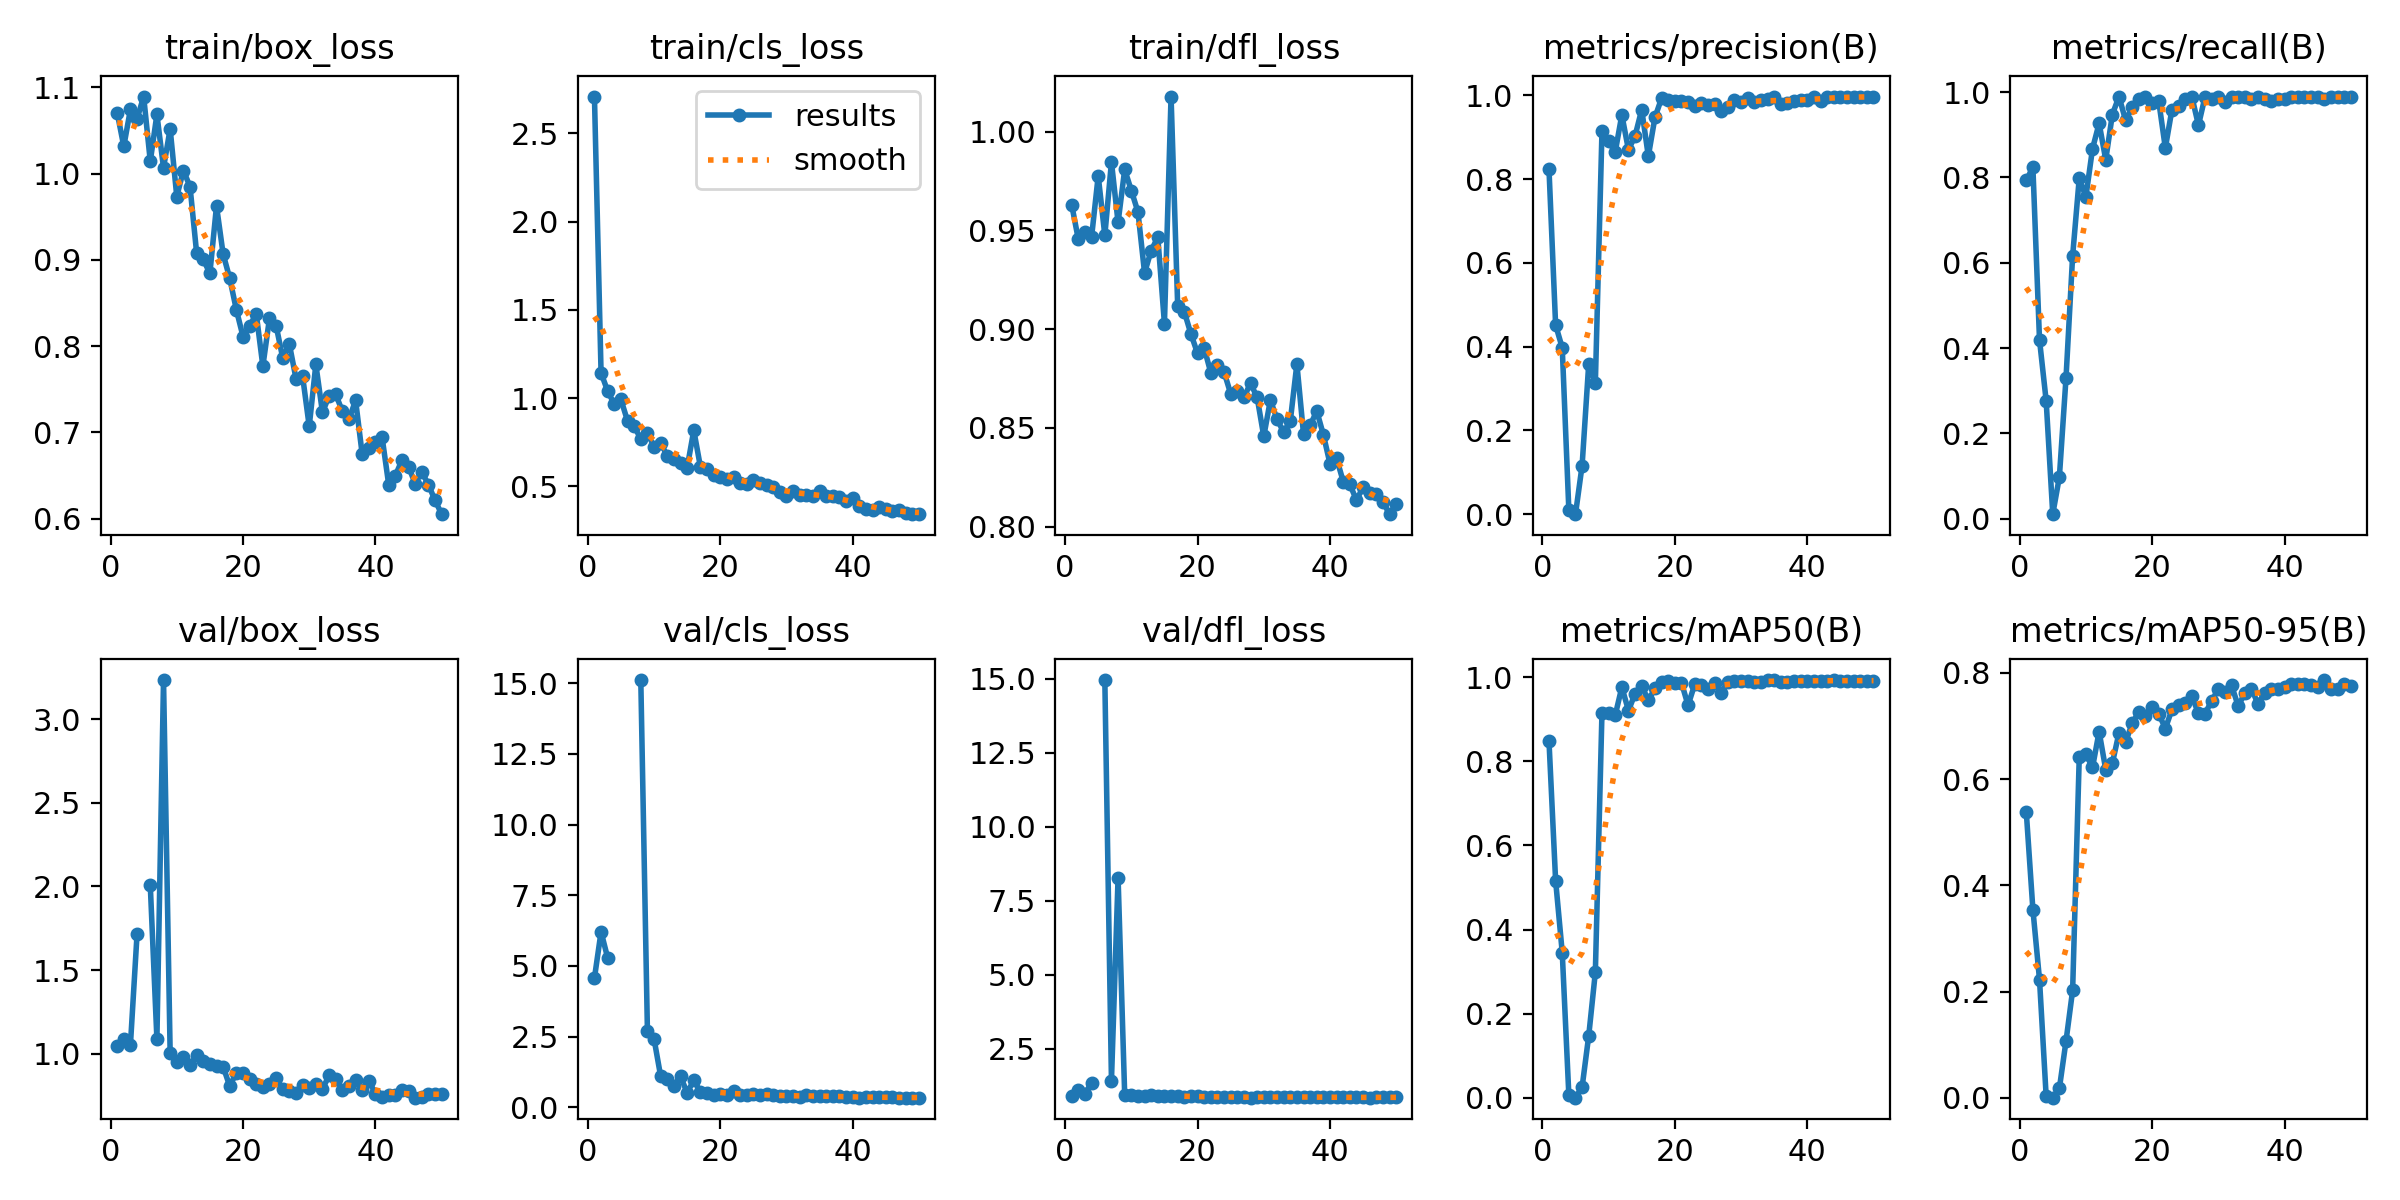

In [ ]:
Image(filename=f'{HOME}/runs/detect/'+train+'/results.png', width=600)

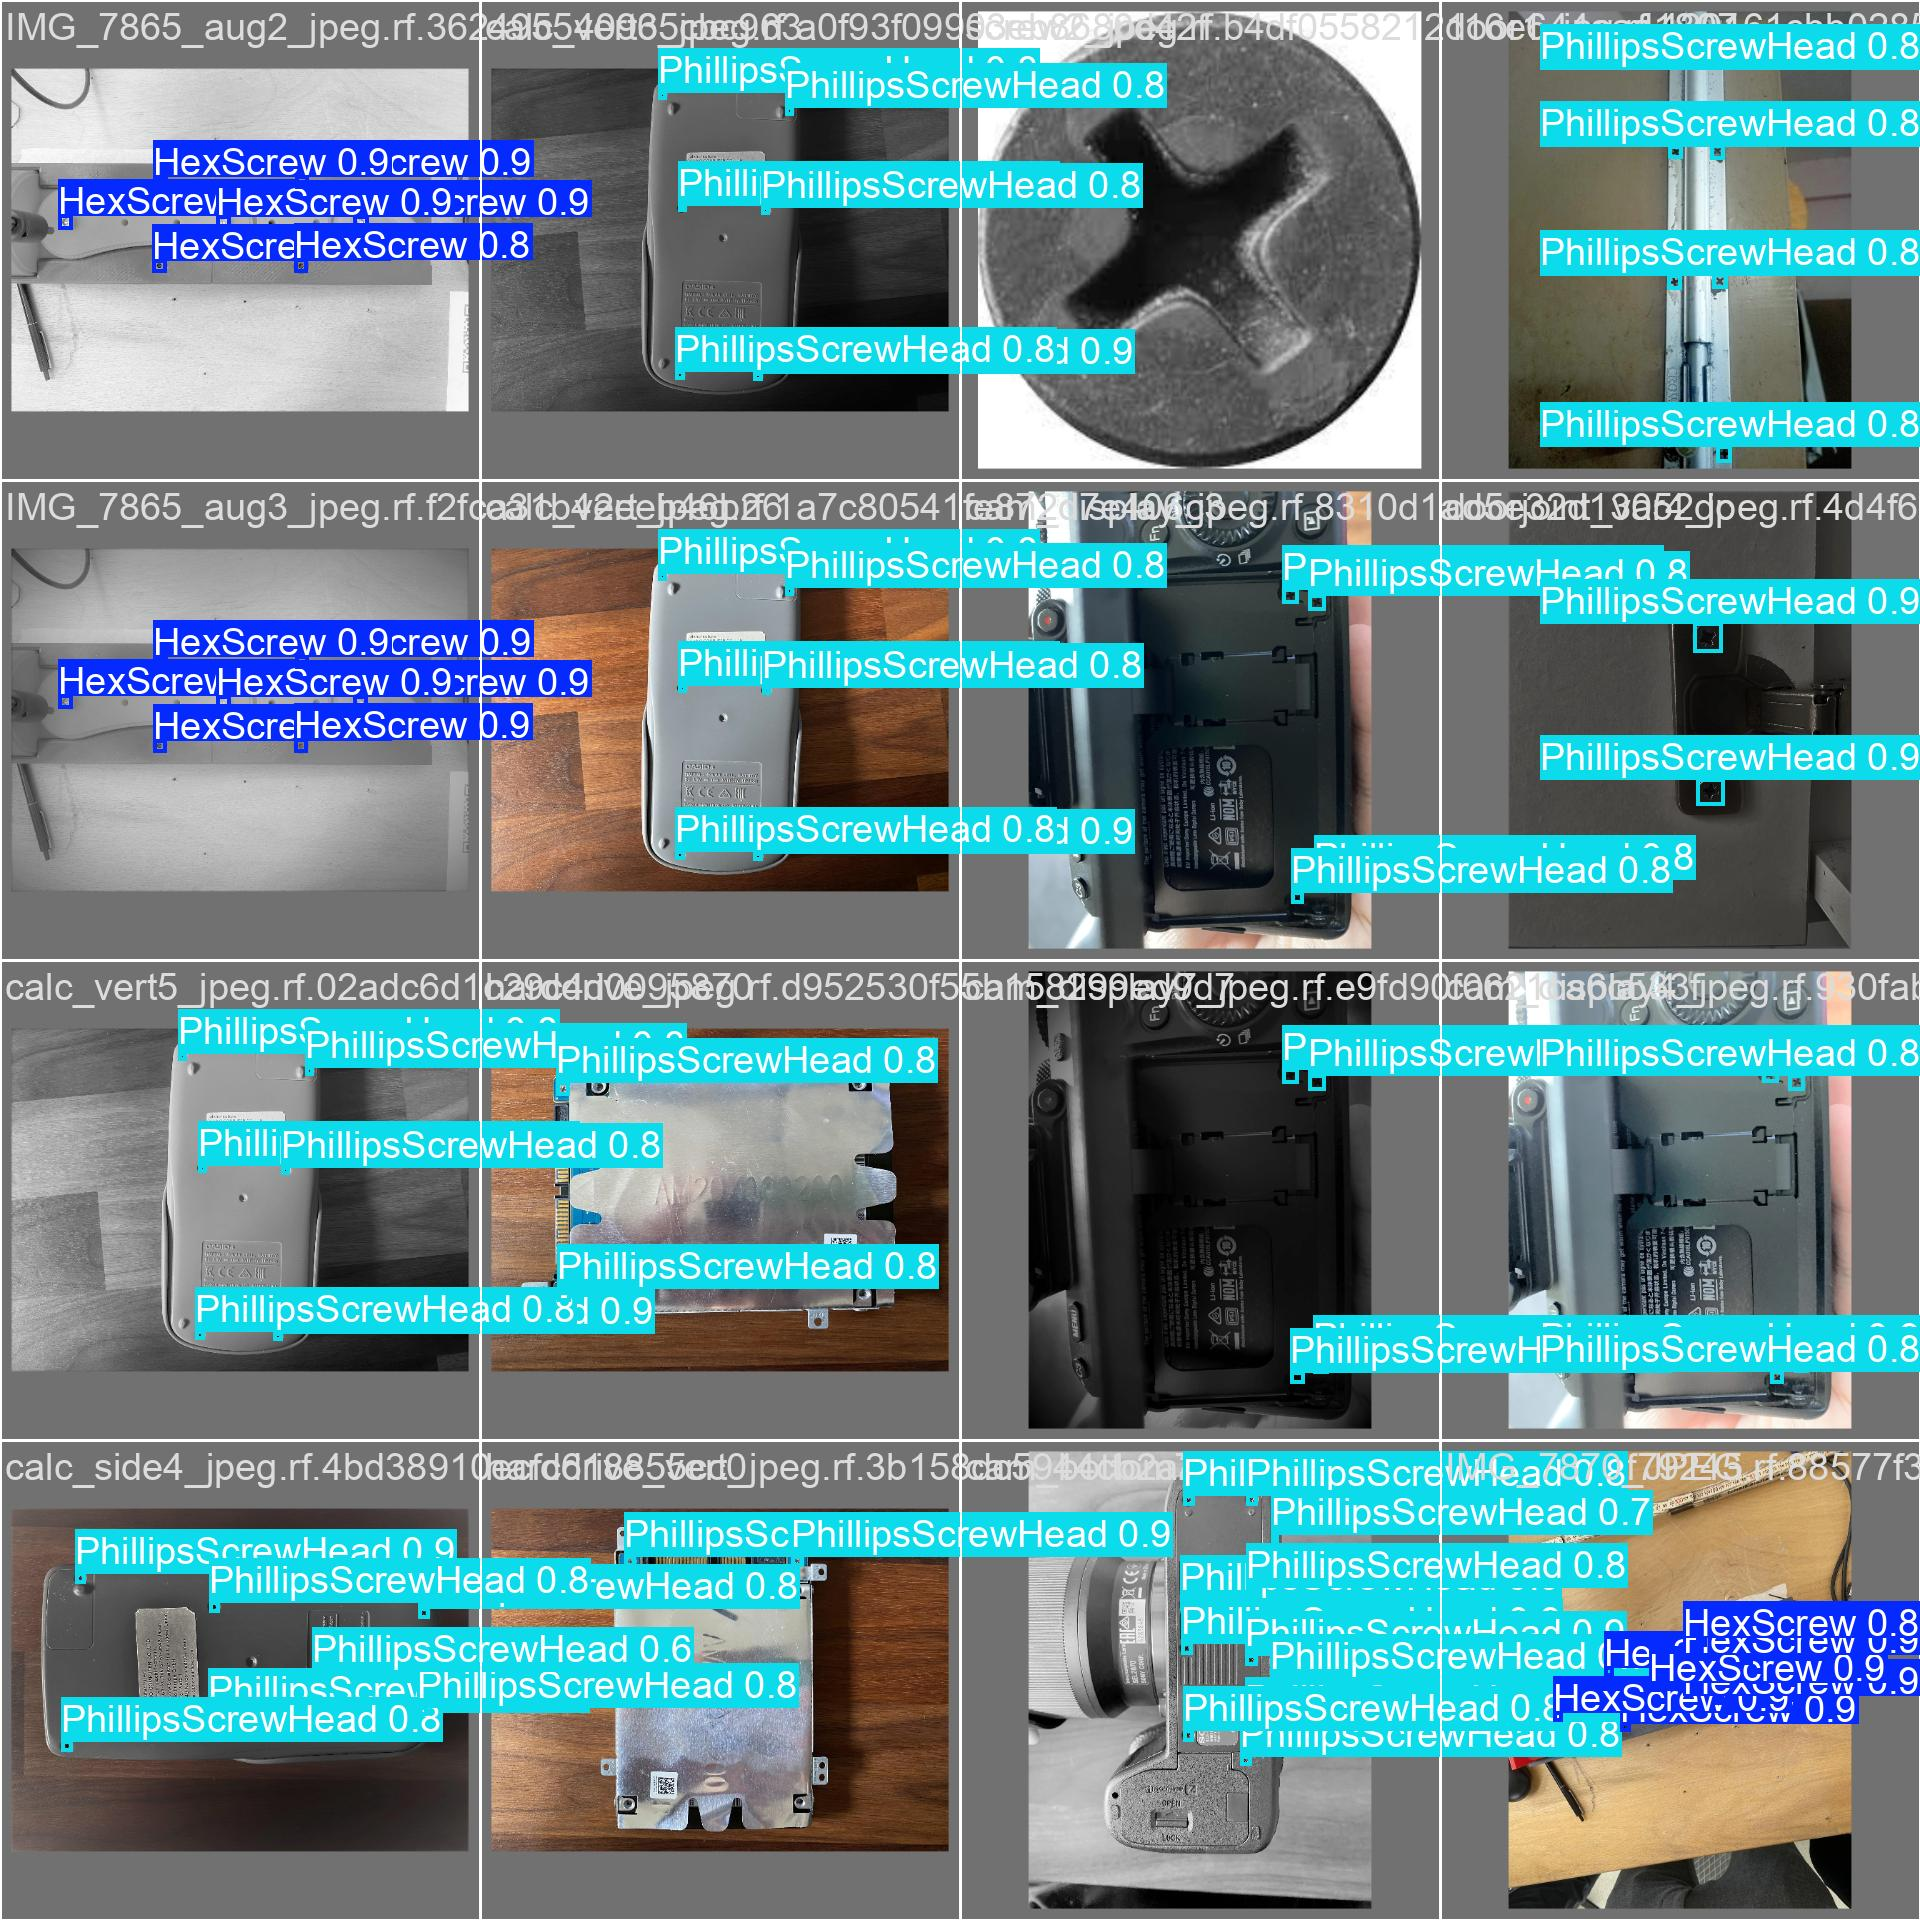

In [ ]:
Image(filename=f'{HOME}/runs/detect/'+train+'/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/screwhead-3/data.yaml

/content
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/screwhead-3/valid/labels.cache... 33 images, 0 backgrounds, 0 corrupt: 100% 33/33 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.12it/s]
                   all         33        120      0.987       0.98      0.991      0.789
              HexScrew          4         25      0.995          1      0.995      0.819
     PhillipsScrewHead         29         95      0.979      0.959      0.988      0.759
Speed: 4.0ms preprocess, 29.8ms inference, 0.0ms loss, 22.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/screwhead-3/test/images

/content
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs

image 1/9 /content/screwhead-3/test/images/IMG_7866_JPEG.rf.301faeeeeb27eec4357925a8c1bab478.jpg: 480x640 6 HexScrews, 68.8ms
image 2/9 /content/screwhead-3/test/images/RandomAssortment6_jpg.rf.50e392273daecd78e74d6c09590129fa.jpg: 640x480 7 PhillipsScrewHeads, 44.0ms
image 3/9 /content/screwhead-3/test/images/cam_bottom4_jpeg.rf.74e75119acaec40a71839478201a7277.jpg: 640x480 11 PhillipsScrewHeads, 27.7ms
image 4/9 /content/screwhead-3/test/images/doorhandle_jpeg.rf.0c812ea8b96a52a14e8ff92b77efce66.jpg: 640x480 2 PhillipsScrewHeads, 27.7ms
image 5/9 /content/screwhead-3/test/images/doorjoint_var1_jpeg.rf.55723d1438bdf1c2c8535199f68c3f6a.jpg: 640x480 2 PhillipsScrewHeads, 27.7ms
image 6/9 /content/screwhead-3/test/images/harddrive_vert2_jpeg.rf.2c719aae12752d2ed74b474b4558058d.jpg: 480x640 2 PhillipsScrewHeads, 28.9

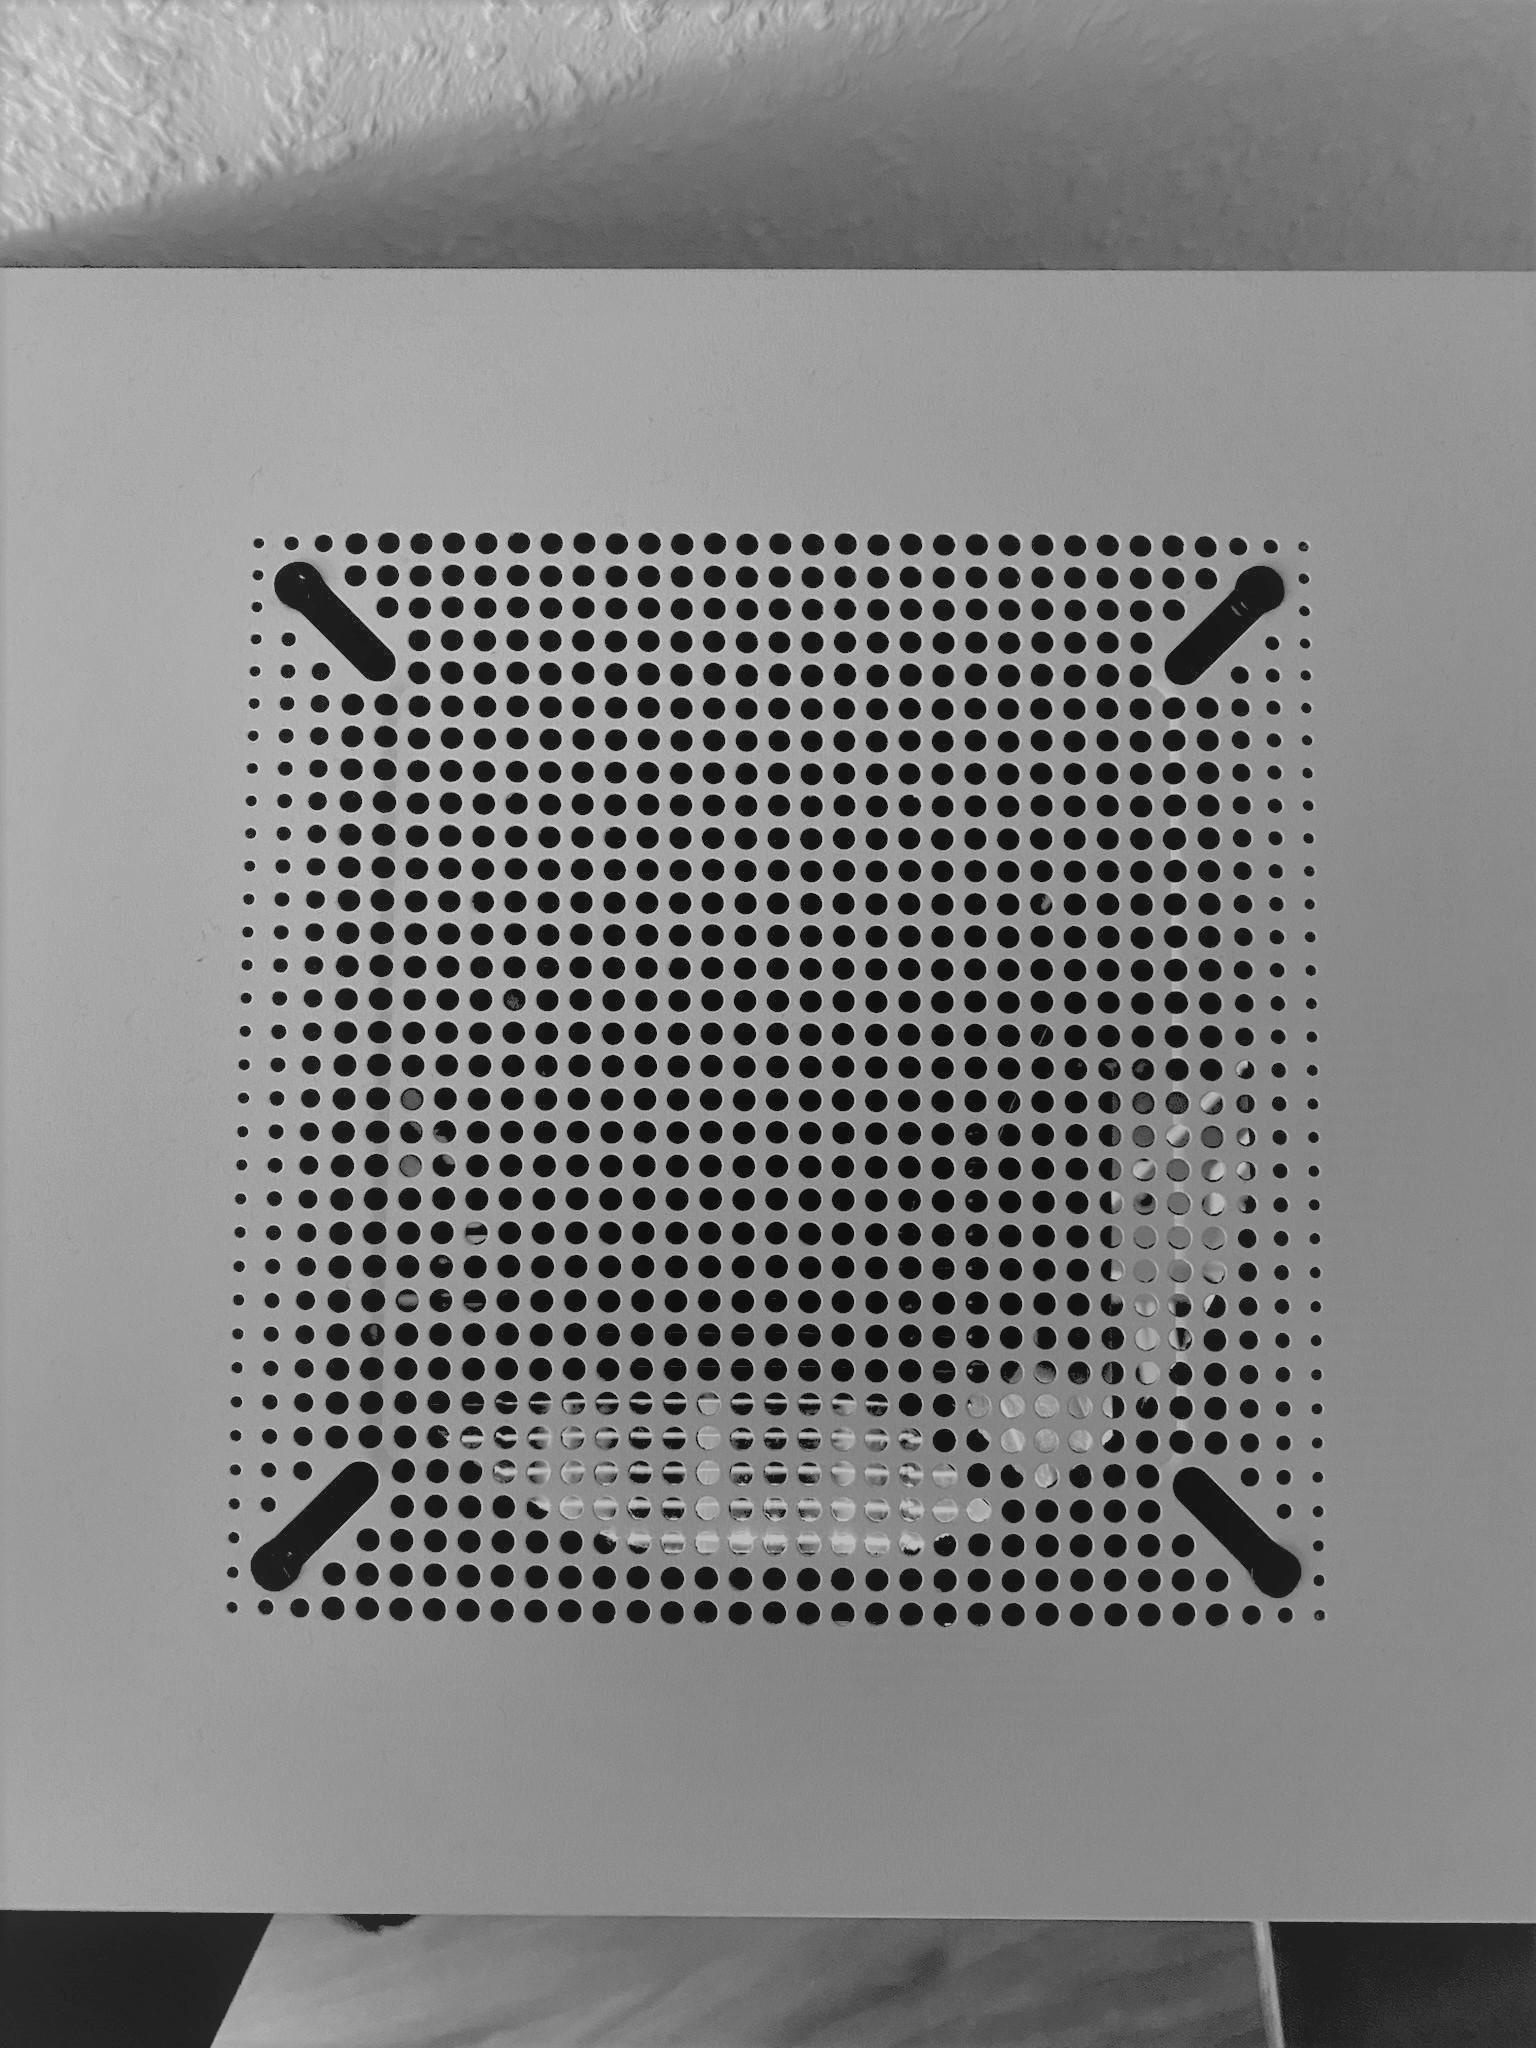

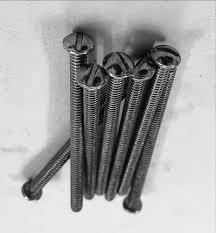

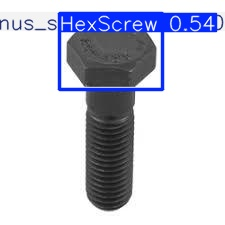

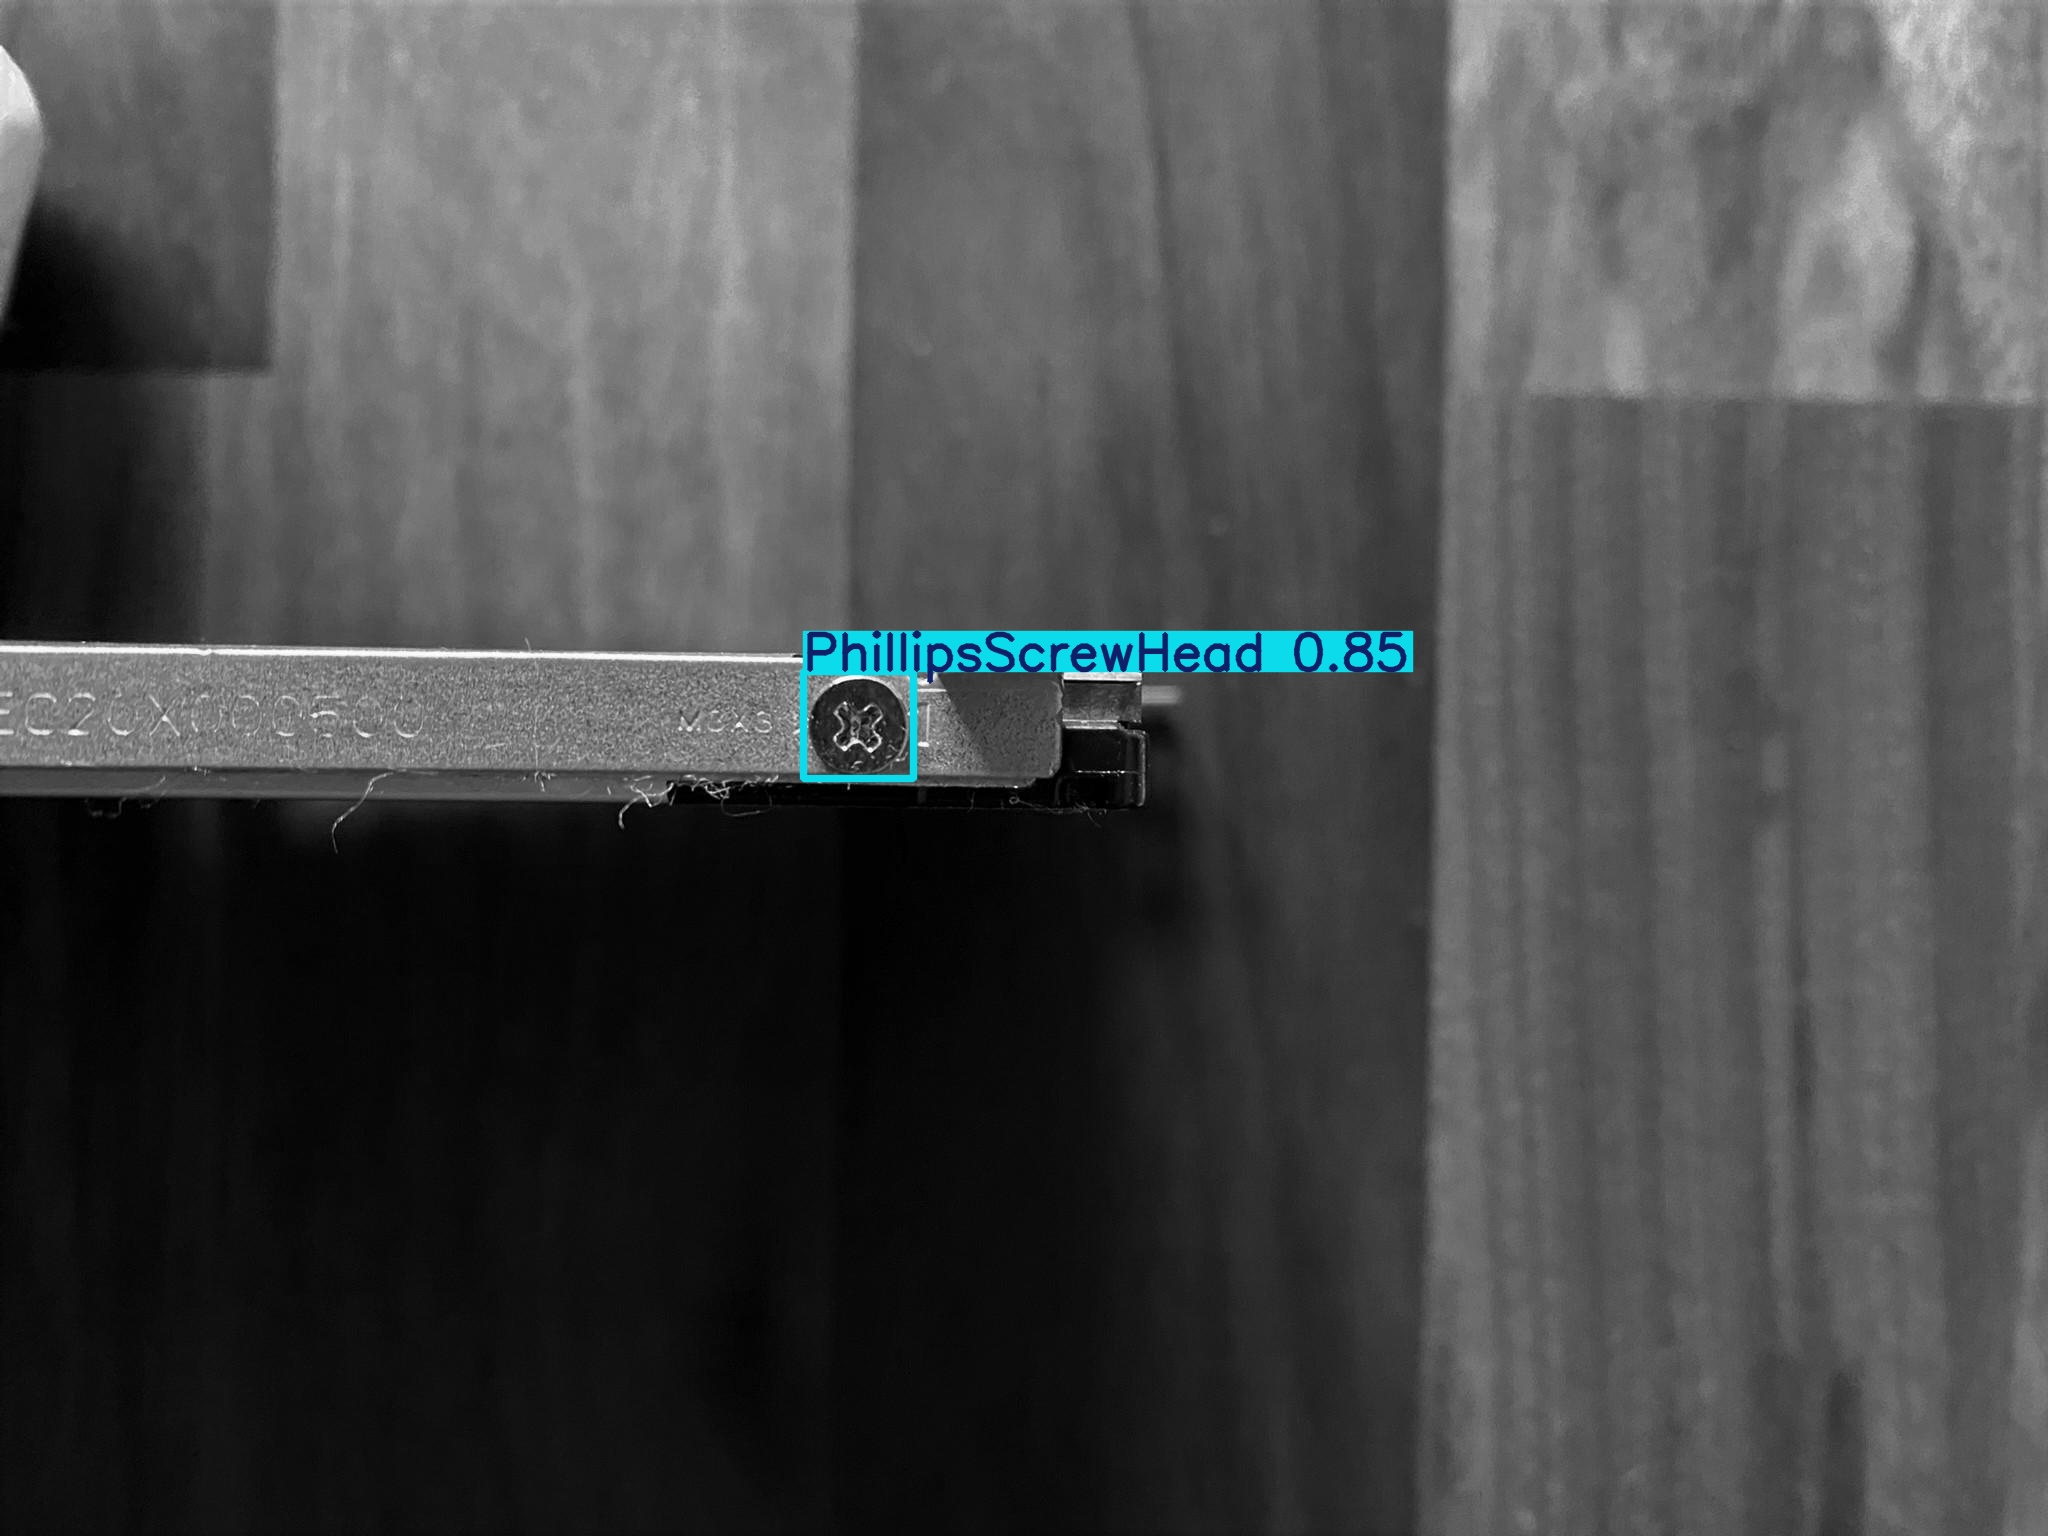

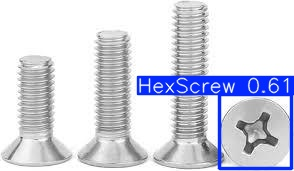

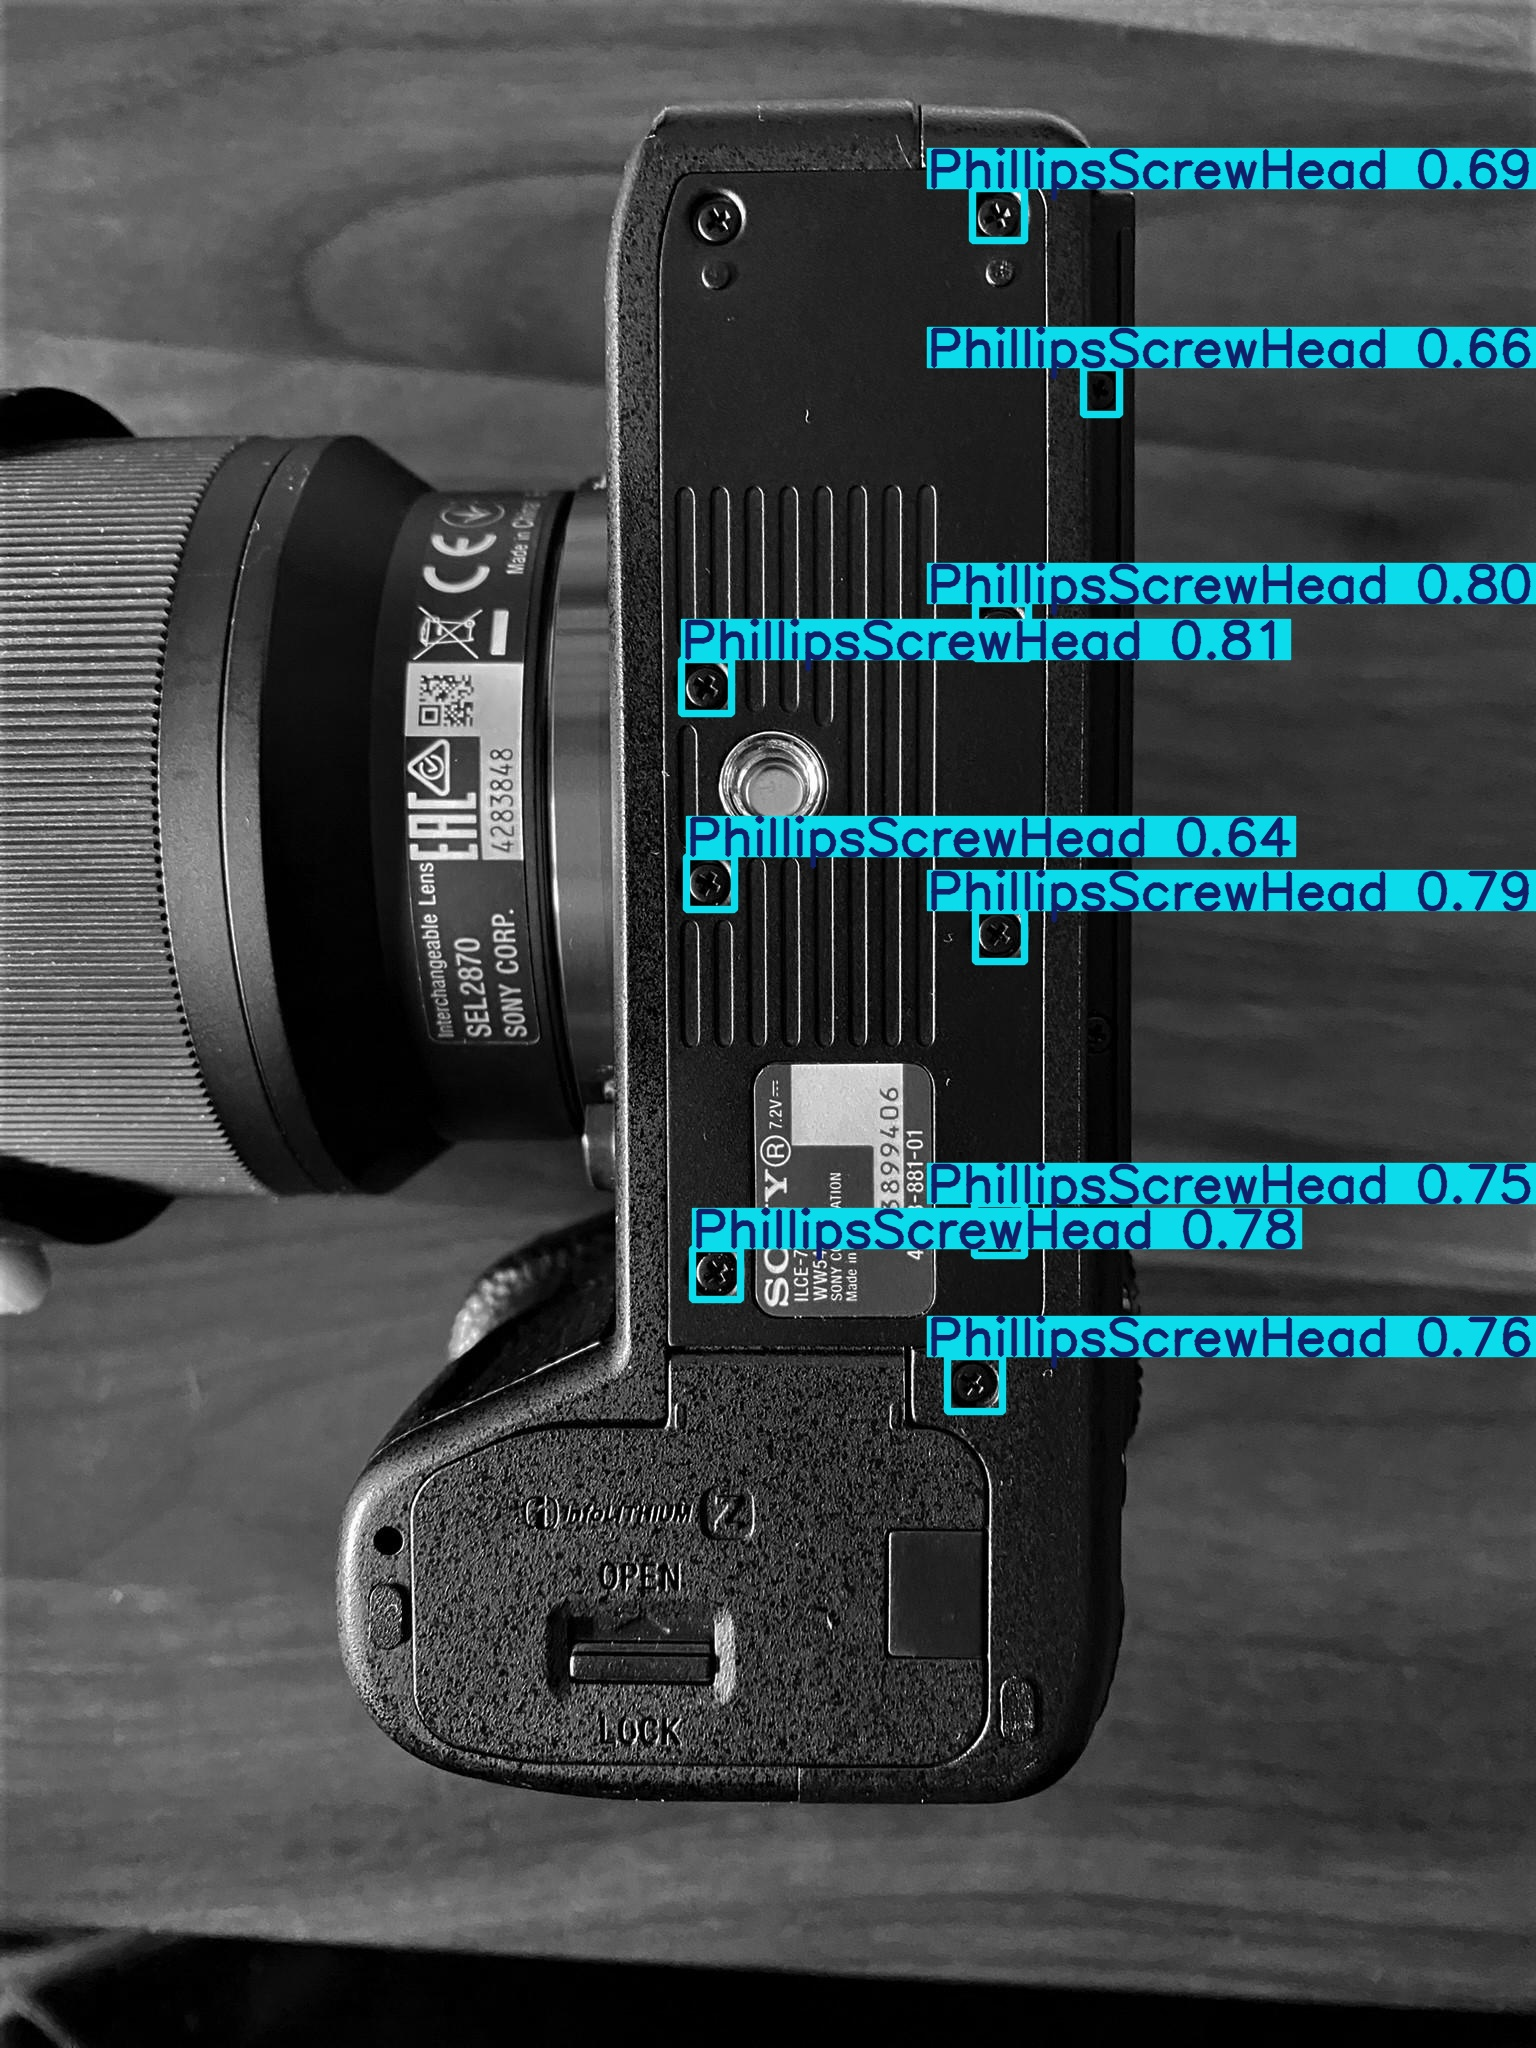

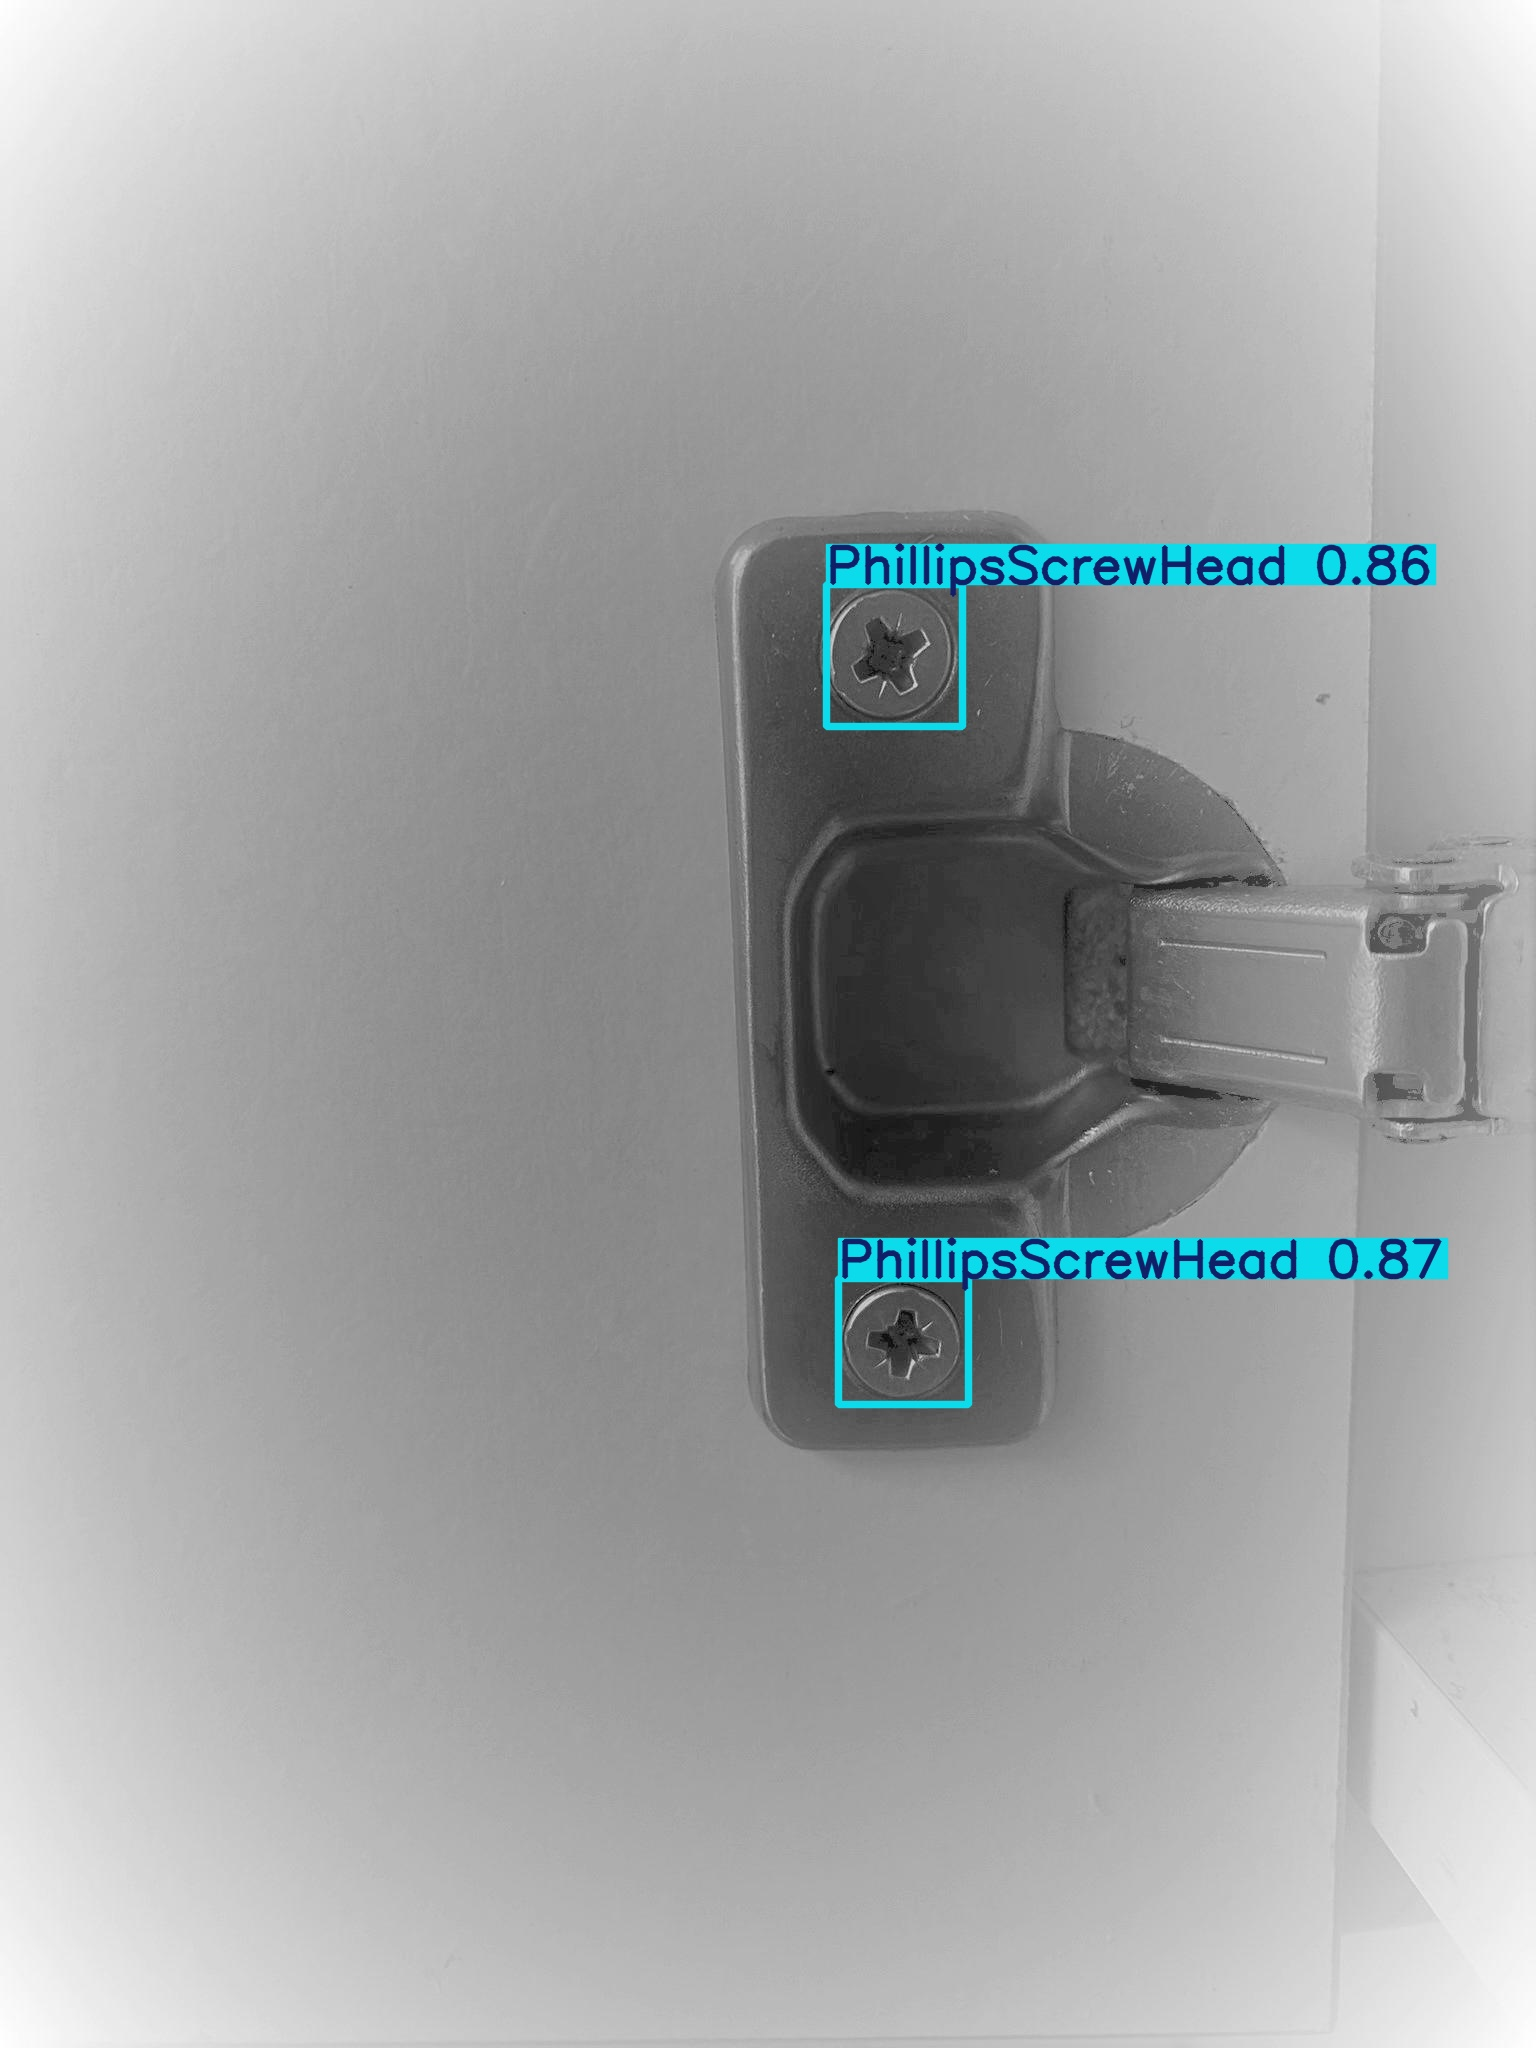

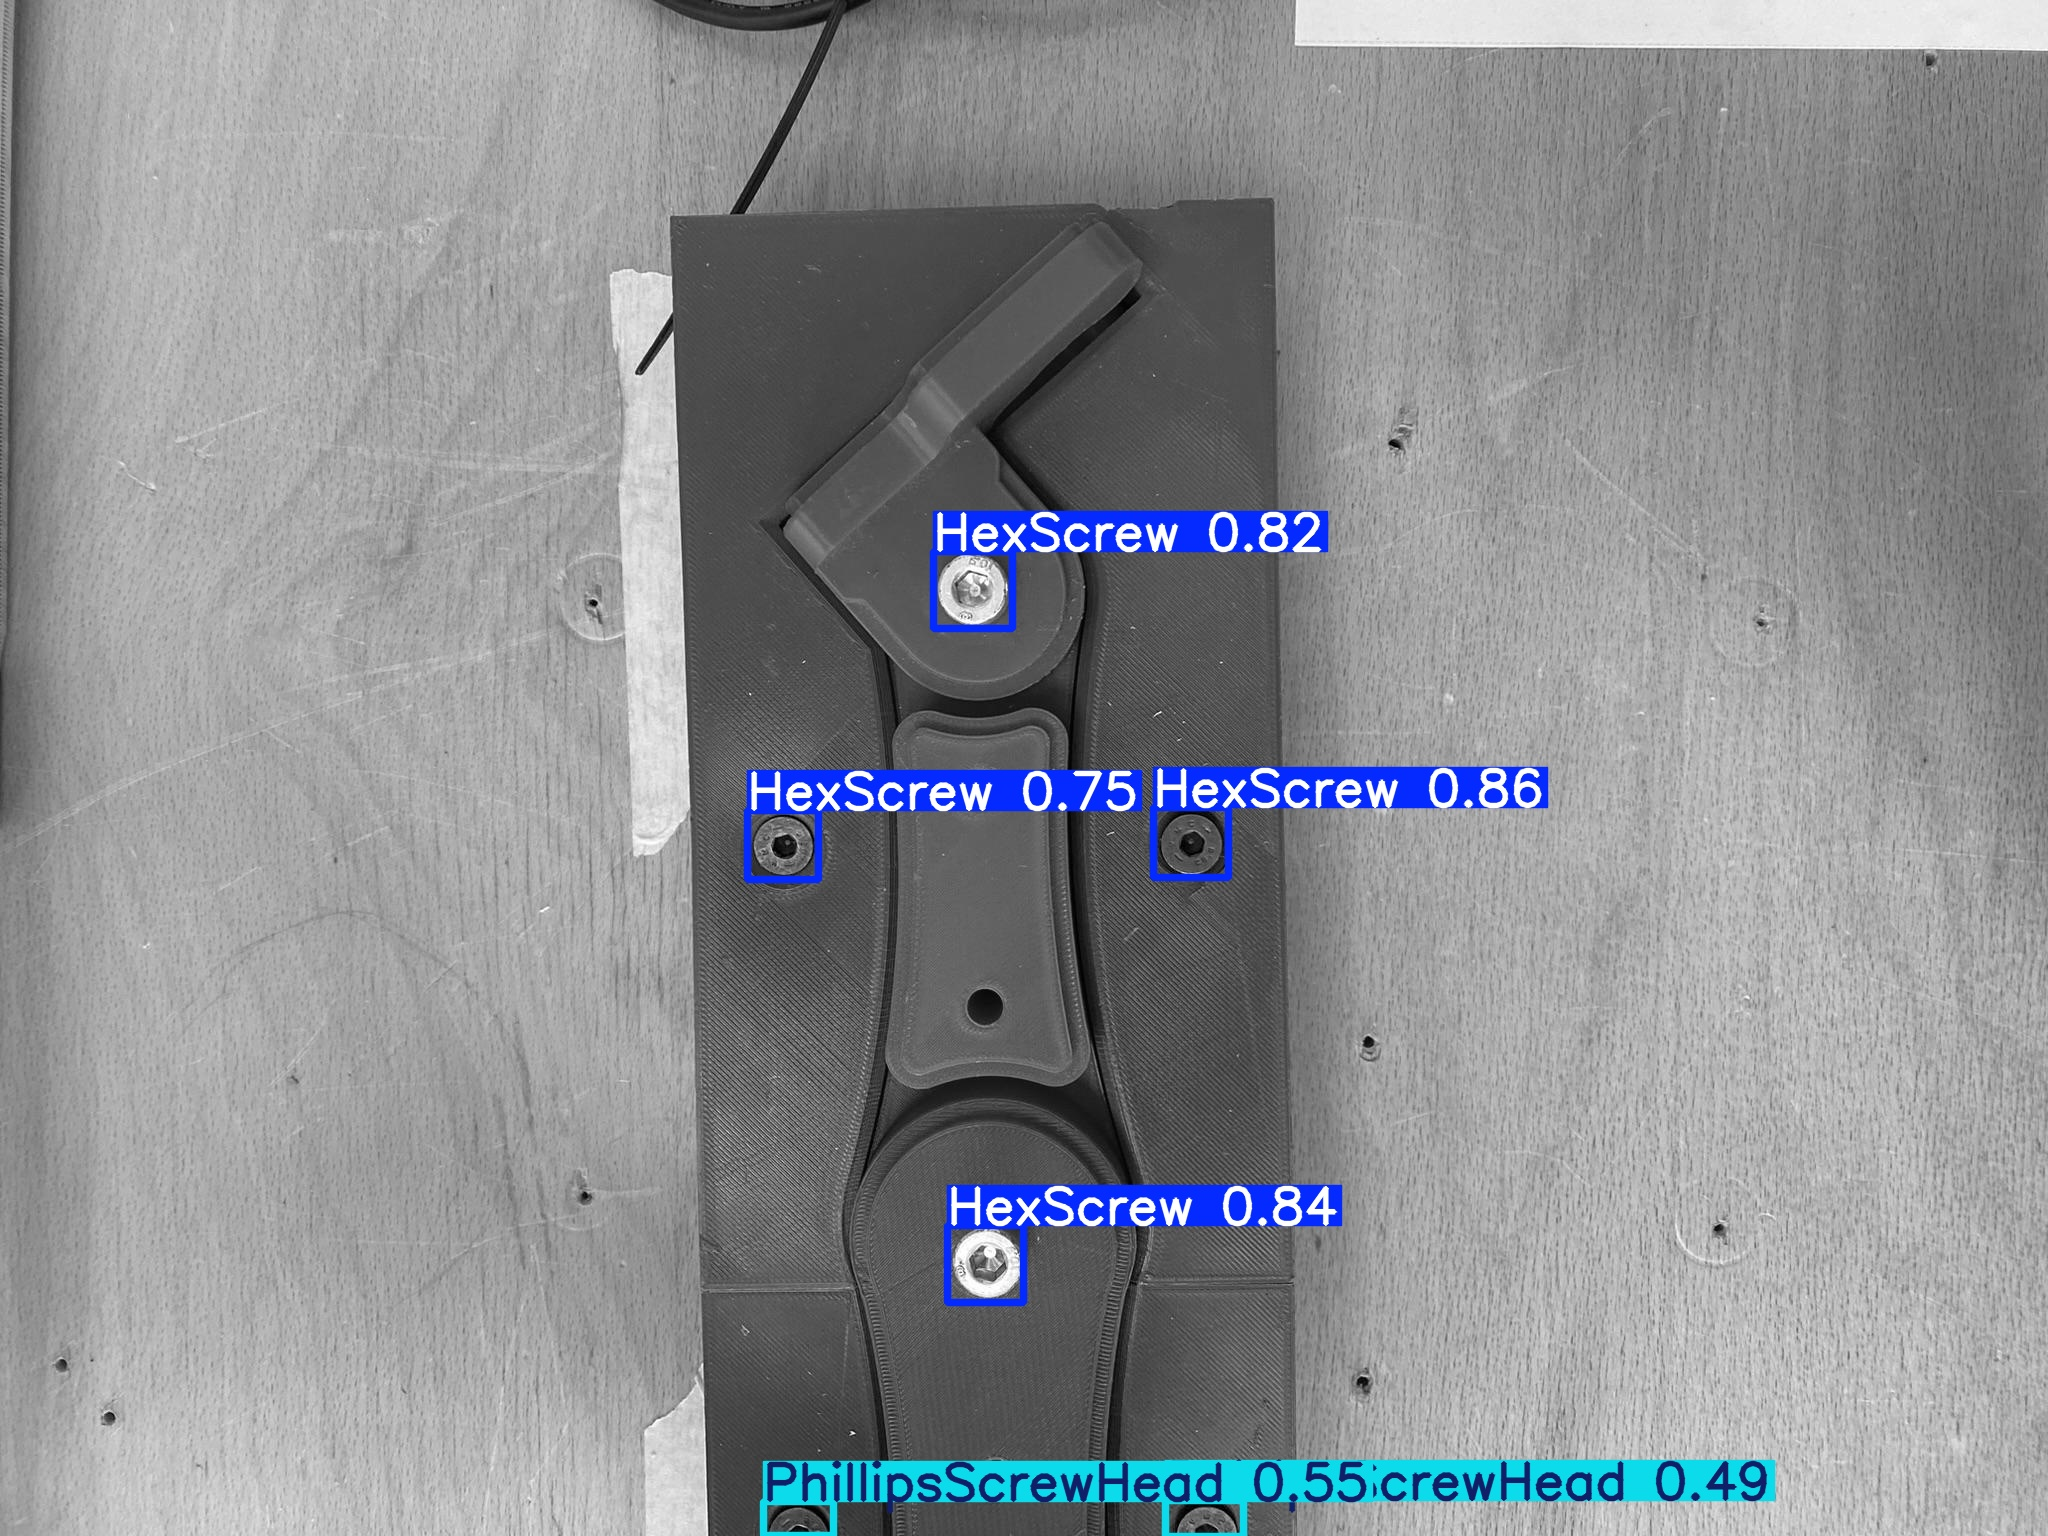

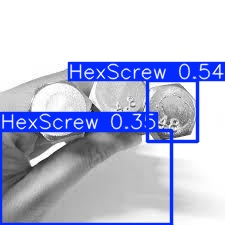

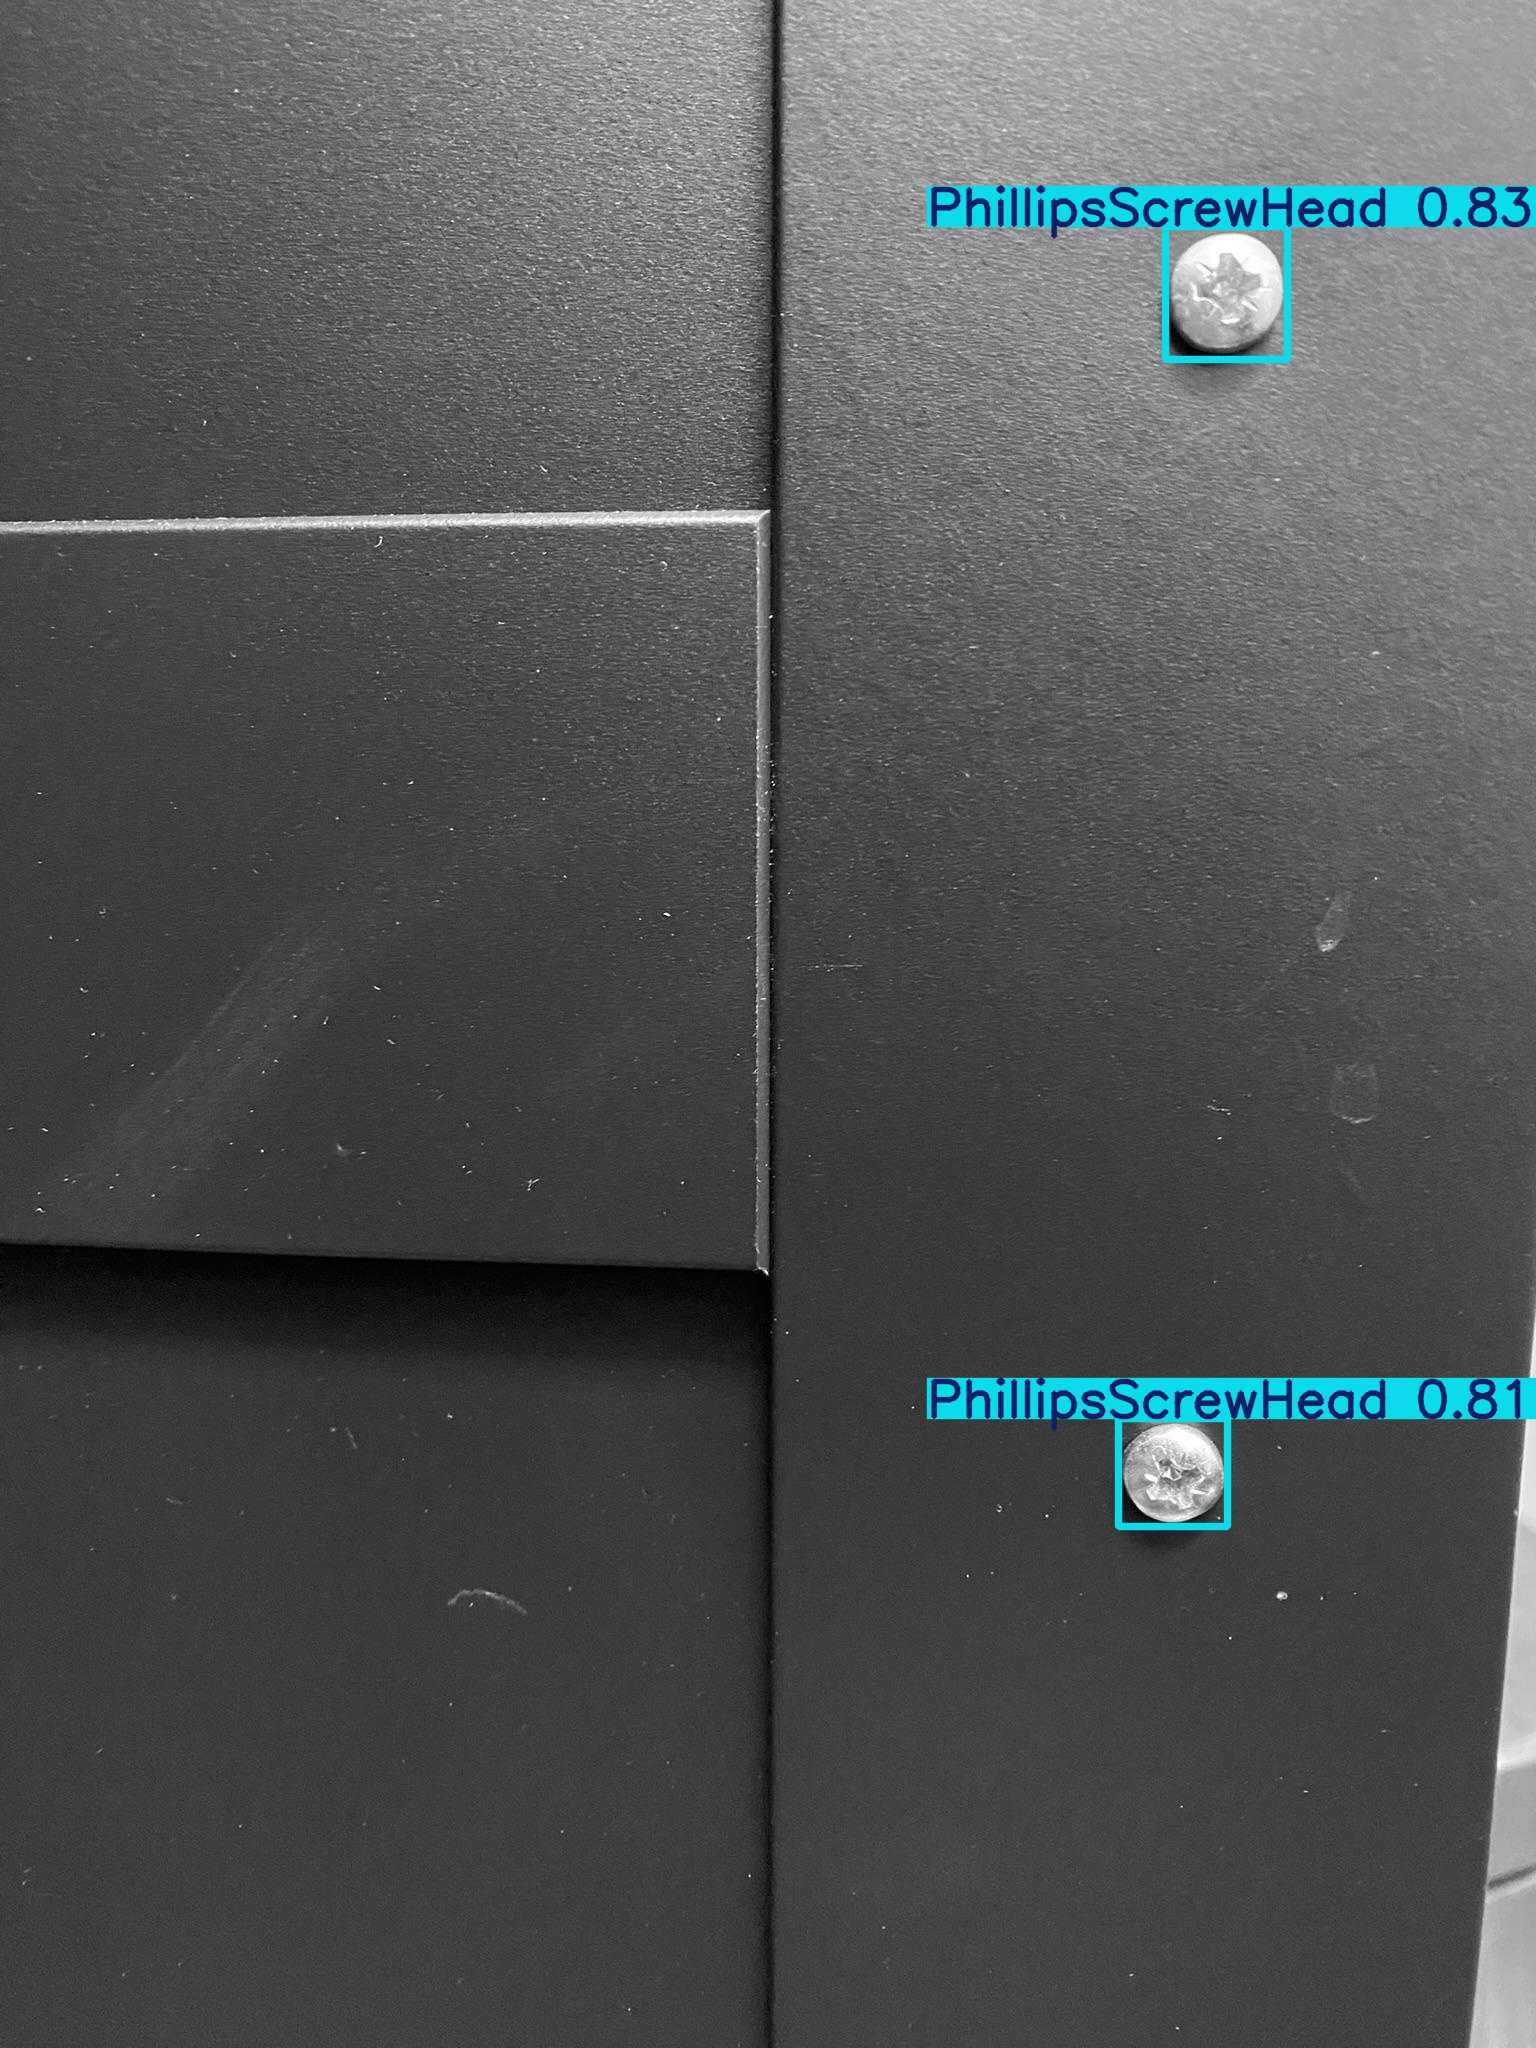

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/runs/detect/predict/*.jpg')[:10]: #assuming JPG
    display(Image(filename=imageName))